In [261]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [231]:
appleH1 = pd.read_csv('../apple_ws_7_h1.csv', delimiter=';', index_col=0)
# selecionamos el index
index=appleH1.index
appleH1.head()

,0,1,2,3,4,5,6,h_1
Date,,,,,,,,
2016-01-13,102.612183,100.040794,98.083023,93.943474,94.440224,95.969421,97.362259,94.859047
2016-01-14,100.040794,98.083023,93.943474,94.440224,95.969421,97.362259,94.859047,96.933693
2016-01-15,98.083023,93.943474,94.440224,95.969421,97.362259,94.859047,96.933693,94.605804
2016-01-19,93.943474,94.440224,95.969421,97.362259,94.859047,96.933693,94.605804,94.148026
2016-01-20,94.440224,95.969421,97.362259,94.859047,96.933693,94.605804,94.148026,94.274643


In [232]:
features = appleH1.ix[:, 0:7].values
label = appleH1.ix[:,7:].values

In [233]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.20)

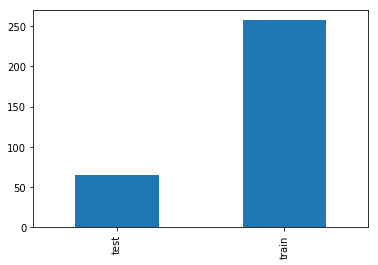

In [234]:
pd.DataFrame({'train': [len(y_train)],
              'test' : [len(y_test)]}).T.plot(kind='bar', legend=False)

Para el uso de **GridSearch** y **RandomSearch** se utilizará las clases de implementadas de estos método de *Scikit-Learn*. Ambas incorporán en su proceso un método de "entranamiento" *K-Fold*, por lo que hay que elegir apropiadamente el número de *folds* para que el conjunto de datos de *train* y *validation* tengas las proporciones adecuadas.

Se quiere que en el **proceso de entrenamiento** el conjunto de datos de *train* y *validation* tenga una proporción de 80% y 20% respectivamente, por lo que el número de *folds* para el *GridSearch* y *RandomSearch* es **5**.


**Nota:** 

Se ha seleccionado las siguientes proporciones:

Se separa la serie temporal en un 80% *train* y un 20% *test*. Con el conjunto de datos de *train* se vuelve a separar un 80% *train* y un 20% *validation*. 

**Fin nota**

In [235]:
cv_method = KFold(len(x_train), 5)

for train_index, test_index  in cv_method:
   
    total = len(train_index) + len(test_index)
    train = (len(train_index)/total)*100
    val = (len(test_index)/total)*100
    print('Fold: Train={0:.2f} % -- Validation={1:.2f} %'.format(train, val)) 

Fold: Train=79.77 % -- Validation=20.23 %
Fold: Train=79.77 % -- Validation=20.23 %
Fold: Train=80.16 % -- Validation=19.84 %
Fold: Train=80.16 % -- Validation=19.84 %
Fold: Train=80.16 % -- Validation=19.84 %


**Link KNN:** http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

## A) Grid Search

**Paso 1:** Definir el espacio de hiperparámetros

In [236]:
tuned_parameters = [
    {'n_neighbors' : [i for i in range(2,30)],
     'weights' : ['uniform']},
    {'n_neighbors' : [i for i in range(2,30)],
     'weights' : ['distance']}
] 

In [237]:
grid_search = GridSearchCV(KNeighborsRegressor(n_neighbors=2),
                           param_grid=tuned_parameters,
                           cv=cv_method,
                           #scoring=mean_squared_error,
                           verbose=1)

**Paso 2:** Entrenamiento del modelo con el conjunto de datos de entrenamiento y validación.

In [238]:
fit_models = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:    0.5s finished


In [239]:
fit_models

GridSearchCV(cv=sklearn.cross_validation.KFold(n=257, n_folds=5, shuffle=False, random_state=None),
       error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}, {'weights': ['distance'], 'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

**Paso 3:** Seleccionamos el mejor modelo 

In [240]:
grid_search.grid_scores_

[mean: 0.98691, std: 0.00346, params: {'weights': 'uniform', 'n_neighbors': 2},
 mean: 0.98638, std: 0.00376, params: {'weights': 'uniform', 'n_neighbors': 3},
 mean: 0.98552, std: 0.00380, params: {'weights': 'uniform', 'n_neighbors': 4},
 mean: 0.98457, std: 0.00393, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.98371, std: 0.00395, params: {'weights': 'uniform', 'n_neighbors': 6},
 mean: 0.98359, std: 0.00394, params: {'weights': 'uniform', 'n_neighbors': 7},
 mean: 0.98321, std: 0.00359, params: {'weights': 'uniform', 'n_neighbors': 8},
 mean: 0.98258, std: 0.00282, params: {'weights': 'uniform', 'n_neighbors': 9},
 mean: 0.98210, std: 0.00306, params: {'weights': 'uniform', 'n_neighbors': 10},
 mean: 0.98196, std: 0.00321, params: {'weights': 'uniform', 'n_neighbors': 11},
 mean: 0.98141, std: 0.00383, params: {'weights': 'uniform', 'n_neighbors': 12},
 mean: 0.98112, std: 0.00330, params: {'weights': 'uniform', 'n_neighbors': 13},
 mean: 0.98015, std: 0.00334, params

In [241]:
for i,j in enumerate(grid_search.grid_scores_):
    print(i, '---',j)
    if j[0]['weights'] == 'uniform':
        print('***', j[0], np.mean(j[2]), np.std(j[2]))
        
    else:
        print('***', j[0], np.mean(j[2]), np.std(j[2]))

0 --- mean: 0.98691, std: 0.00346, params: {'weights': 'uniform', 'n_neighbors': 2}
*** {'weights': 'uniform', 'n_neighbors': 2} 0.986897564897 0.00345642315128
1 --- mean: 0.98638, std: 0.00376, params: {'weights': 'uniform', 'n_neighbors': 3}
*** {'weights': 'uniform', 'n_neighbors': 3} 0.986367053669 0.00375821515592
2 --- mean: 0.98552, std: 0.00380, params: {'weights': 'uniform', 'n_neighbors': 4}
*** {'weights': 'uniform', 'n_neighbors': 4} 0.985506883603 0.00379556719782
3 --- mean: 0.98457, std: 0.00393, params: {'weights': 'uniform', 'n_neighbors': 5}
*** {'weights': 'uniform', 'n_neighbors': 5} 0.984570035273 0.00393158409624
4 --- mean: 0.98371, std: 0.00395, params: {'weights': 'uniform', 'n_neighbors': 6}
*** {'weights': 'uniform', 'n_neighbors': 6} 0.983707599861 0.00395342916751
5 --- mean: 0.98359, std: 0.00394, params: {'weights': 'uniform', 'n_neighbors': 7}
*** {'weights': 'uniform', 'n_neighbors': 7} 0.983581282814 0.00393796787322
6 --- mean: 0.98321, std: 0.00359,

In [242]:
best_model = grid_search.best_estimator_
best_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='distance')

In [243]:
grid_search.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

In [244]:
'Error Mejor modelo de entrenamiento:{0}'.format(grid_search.best_score_)

'Error Mejor modelo de entrenamiento:0.9873630300307472'

**Paso 4:** Analizamos el overfitting y underfitting del modelo mejor.

In [246]:
mseTrain = []
mseVal = []

for train_index, test_index  in cv_method:
    x_train_, x_val_ = x_train[train_index], x_train[test_index]
    y_train_, y_val_ = y_train[train_index], y_train[test_index]
    
    predTrain = best_model.predict(x_train_)
    predVal = best_model.predict(x_val_)
    
    mseTrain.append(mean_squared_error(y_train_, predTrain))
    mseVal.append(mean_squared_error(y_val_, predVal))
    
mseTrain

[0.0, 0.0, 0.0, 0.0, 0.0]

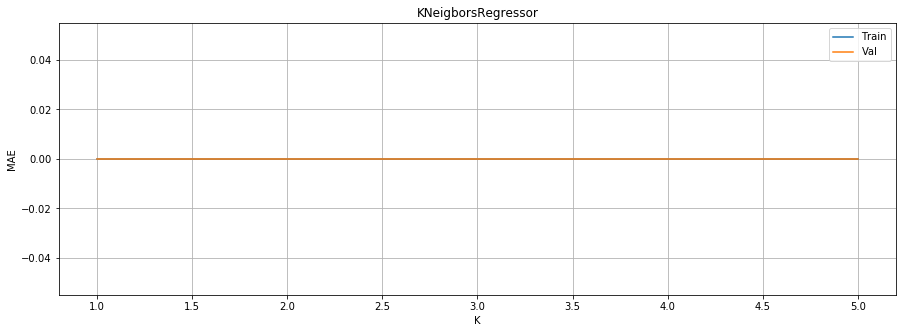

In [247]:
f = plt.figure(figsize=(15,5))
plt.plot(range(1, 6), mseTrain, label='Train')
plt.plot(range(1, 6), mseVal, label='Val')
plt.xlabel('K'); plt.ylabel('MAE')
plt.title('KNeigborsRegressor')
plt.grid()
plt.legend(loc='best')

**Paso 4:** Predicción con el modelo entrenado sobre el conjunto de datos test.

In [248]:
predTest = best_model.predict(x_test)

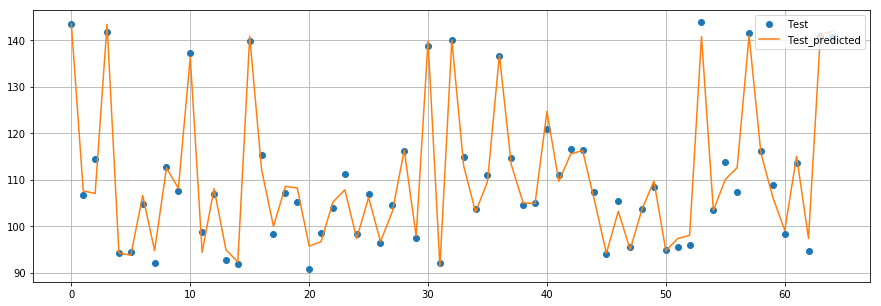

In [249]:
f, ax =  plt.subplots(figsize=(15,5))
ax.plot(y_test.flatten(), 'o', label='Test')
ax.plot(predTest.flatten(), label='Test_predicted')
ax.grid()
ax.legend(loc=1)

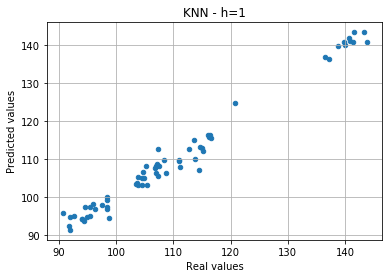

In [250]:
ax = pd.DataFrame({'Real values': y_test.flatten(),
                   'Predicted values': predTest.flatten()}).plot(kind='scatter',
                                                     x='Real values', 
                                                     y='Predicted values',
                                                     title='KNN - h=1',
                                                     grid=True)


In [251]:
'Mean Squared Error: {0}'.format(mean_squared_error(y_test.flatten(), 
                                                    predTest.flatten()))

'Mean Squared Error: 4.3814733186976484'

## B) RandomSearch

In [258]:
param_distribution ={
    'n_neighbors' : [i for i in range(2,30)],
    #'weights' : ['uniform', 'distance']
}    

In [259]:
n_iter_search = 10
random_search = RandomizedSearchCV(KNeighborsRegressor(n_neighbors=2),
                                   param_distributions=tuned_parameters,
                                   cv=cv_method,
                                   #scoring=mean_squared_error,
                                   n_iter=n_iter_search,
                                   verbose=1)

In [260]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


AttributeError: 'list' object has no attribute 'values'